In [20]:
import numpy as np 
import pandas as pd
import os
import os
for dirname, _, filenames in os.walk('/dataset_licenta'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [21]:
#Importing the csv data 

AFdata = pd.read_csv('AFset.csv', header=None)
NAFdata = pd.read_csv('NonAFset.csv', header=None)

print('Atrial Fibrilation heart data information')
AFdata.info()
print ()
print('Non Atrial Fibrilation heart data information')
NAFdata.info()




Atrial Fibrilation heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB

Non Atrial Fibrilation heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


In [22]:
AFdata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
NAFdata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Standard Deviation for heart data')

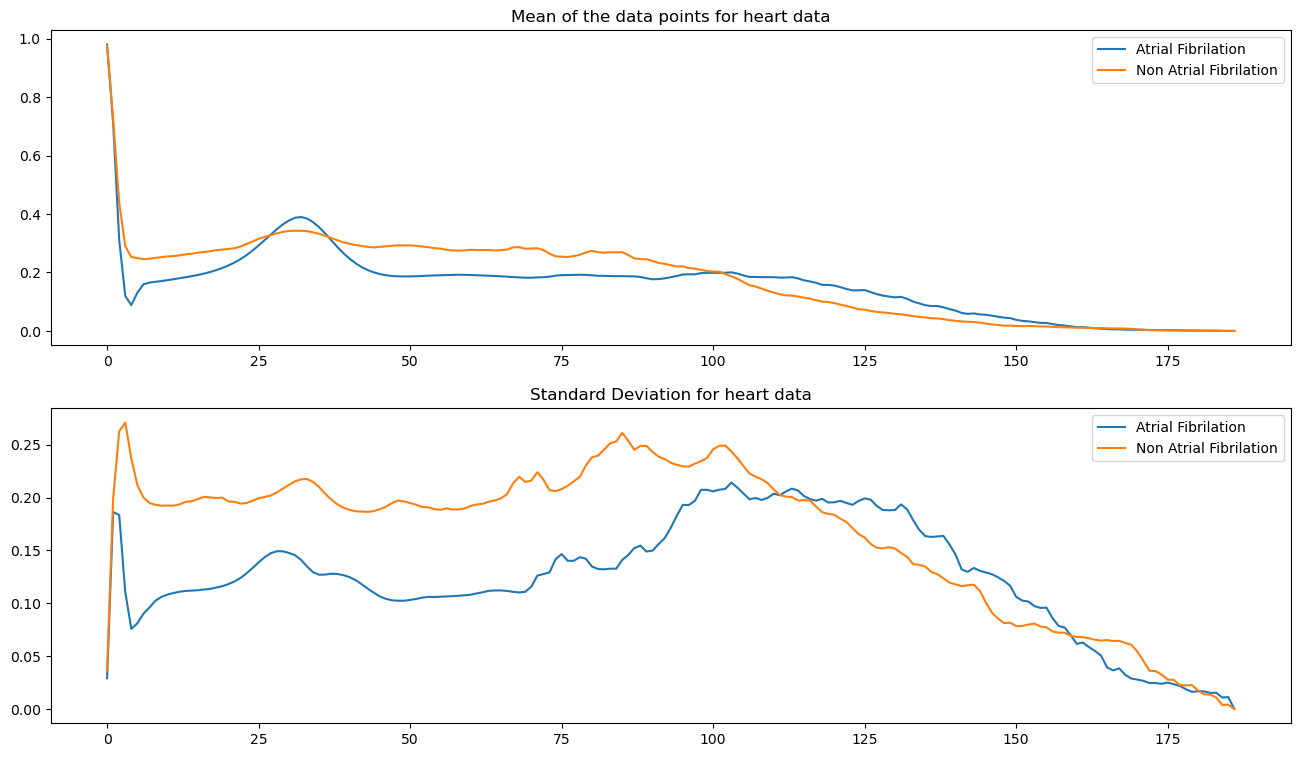

In [24]:
_, (ax1,ax2) = plt.subplots(2,1, figsize=(16,9))

#Plotting the mean of the data

ax1.plot(AFdata.loc[:,:186].mean(), label='Atrial Fibrilation')
ax1.plot(NAFdata.loc[:,:186].mean(), label='Non Atrial Fibrilation')
ax1.set_title("Mean of the data points for heart data")
ax1.legend()

#Plotting the standard deviation for the data

ax2.plot(AFdata.loc[:,:186].std(), label='Atrial Fibrilation')
ax2.plot(NAFdata.loc[:,:186].std(), label='Non Atrial Fibrilation')
ax2.legend()
ax2.set_title("Standard Deviation for heart data")

In [25]:
#Concatenating the AF heart data with the Non AF one

print('All heart data information')
ALLdata = pd.concat([AFdata, NAFdata], axis=0, ignore_index=True)
print(ALLdata.info())
ALLdata.head()



All heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB
None


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Splitting into training and testing

ALLdata.loc[:,187].value_counts()

X = ALLdata.loc[:,:186]
y = ALLdata.loc[:,187]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
#Logistic Regression

log_model = LogisticRegression(random_state=0, max_iter=5000)
log_model.fit(X_train, y_train)

predicted_log=log_model.predict([X_test.iloc[0,:]])
print('Predict value using the LogisticRegression model:',end='')
print(predicted_log)
print('The true value:',end='')
print(y_test.iloc[0])

Predict value using the LogisticRegression model:[1.]
The true value:1.0


In [29]:
#Decision Tree

dec_tree_model = DecisionTreeClassifier(random_state=0)
dec_tree_model.fit(X_train, y_train)

predicted_tree = dec_tree_model.predict([X_test.iloc[1,:]])
print('predict value using the DecisionTreeClassifier model: ', end='')
print(predicted_tree)
print('The true value: ',end='')
print(y_test.iloc[1])

predict value using the DecisionTreeClassifier model: [0.]
The true value: 0.0


In [30]:
#KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

predicted_knn = knn_model.predict([X_test.iloc[2,:]])
print('predict value using the knn model: ', end='')
print(predicted_knn)
print('The true value: ',end='')
print(y_test.iloc[2])

predict value using the knn model: [1.]
The true value: 1.0


In [31]:
#Random Forest Classifier

rand_model = RandomForestClassifier()
rand_model.fit(X_train, y_train)

predicted_rand = rand_model.predict([X_test.iloc[3,:]])
print('predict value using the Random Forest model: ', end='')
print(predicted_rand)
print('The true value: ',end='')
print(y_test.iloc[3])

predict value using the Random Forest model: [1.]
The true value: 1.0


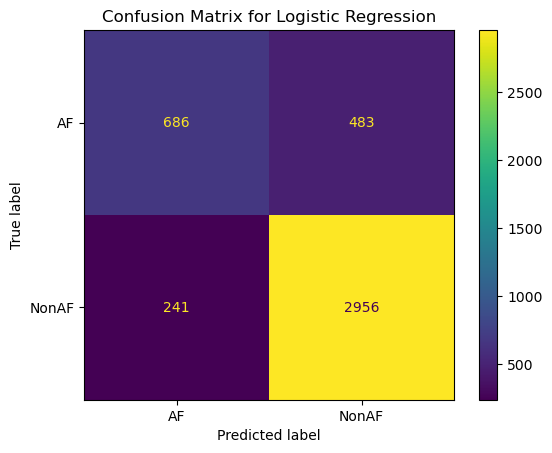

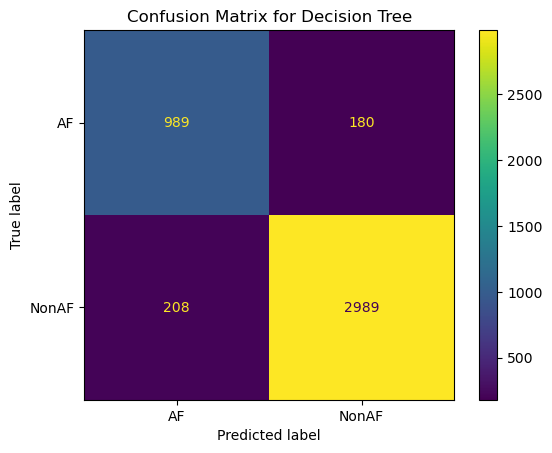

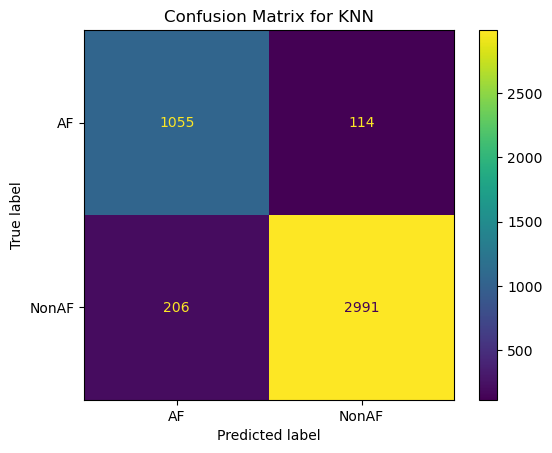

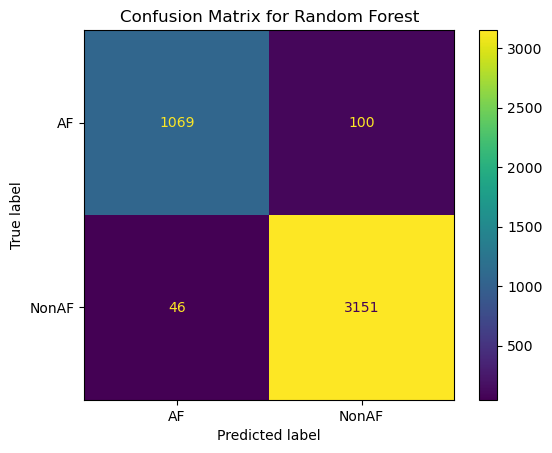

In [32]:
#Confusion Matrix for Logistic Regression

predicted = log_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["AF", "NonAF"])
cm_display.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#Confusion Matrix for Decision Tree

predicted = dec_tree_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["AF", "NonAF"])
cm_display.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

#Confusion Matrix KNN

predicted = knn_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["AF", "NonAF"])
cm_display.plot()
plt.title('Confusion Matrix for KNN')
plt.show()

#Confusion Matrix Random Forest

predicted = rand_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["AF", "NonAF"])
cm_display.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()



In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Evaluation for Training

# Evaluate the logistic regression model
predicted = log_model.predict(X_train)
accuracy = accuracy_score(y_train, predicted)
precision = precision_score(y_train, predicted)
recall = recall_score(y_train, predicted)
f1 = f1_score(y_train, predicted)

print('Logistic Regression:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print()

# Evaluate the decision tree model
predicted = dec_tree_model.predict(X_train)
accuracy = accuracy_score(y_train, predicted)
precision = precision_score(y_train, predicted)
recall = recall_score(y_train, predicted)
f1 = f1_score(y_train, predicted)

print('Decision Tree:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print()

# Evaluate the k-neighbors classifier
predicted = knn_model.predict(X_train)
accuracy = accuracy_score(y_train, predicted)
precision = precision_score(y_train, predicted)
recall = recall_score(y_train, predicted)
f1 = f1_score(y_train, predicted)

print('K-Neighbors Classifier:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print()

# Evaluate the random forest classifier
predicted = rand_model.predict(X_train)
accuracy = accuracy_score(y_train, predicted)
precision = precision_score(y_train, predicted)
recall = recall_score(y_train, predicted)
f1 = f1_score(y_train, predicted)

print('Random Forest Classifier:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Logistic Regression:
Accuracy: 0.8315
Precision: 0.8568
Recall: 0.9187
F1-score: 0.8867

Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

K-Neighbors Classifier:
Accuracy: 0.9547
Precision: 0.9749
Recall: 0.9617
F1-score: 0.9682

Random Forest Classifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# Evaluation for Testing

# Calculate the sample weights
n_non_af = 10506
n_af = 4046
sample_weight = np.where(y_test == 0, 1 / n_non_af, 1 / n_af)

# Evaluate the logistic regression model
predicted = log_model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
ba=balanced_accuracy_score(y_test, predicted, sample_weight=sample_weight, adjusted=False)

print('Logistic Regression:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Balanced Accuracy: {ba:.4f}')
print()

# Evaluate the decision tree model
predicted = dec_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
ba=balanced_accuracy_score(y_test, predicted, sample_weight=sample_weight, adjusted=False)

print('Decision Tree:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Balanced Accuracy: {ba:.4f}')
print()

# Evaluate the k-neighbors classifier
predicted = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
ba=balanced_accuracy_score(y_test, predicted, sample_weight=sample_weight, adjusted=False)

print('K-Neighbors Classifier:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Balanced Accuracy: {ba:.4f}')
print()

# Evaluate the random forest classifier
predicted = rand_model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
ba=balanced_accuracy_score(y_test, predicted, sample_weight=sample_weight, adjusted=False)

print('Random Forest Classifier:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Balanced Accuracy: {ba:.4f}')


Logistic Regression:
Accuracy: 0.8342
Precision: 0.8596
Recall: 0.9246
F1-score: 0.8909
Balanced Accuracy: 0.7557

Decision Tree:
Accuracy: 0.9111
Precision: 0.9432
Recall: 0.9349
F1-score: 0.9391
Balanced Accuracy: 0.8905

K-Neighbors Classifier:
Accuracy: 0.9267
Precision: 0.9633
Recall: 0.9356
F1-score: 0.9492
Balanced Accuracy: 0.9190

Random Forest Classifier:
Accuracy: 0.9666
Precision: 0.9692
Recall: 0.9856
F1-score: 0.9774
Balanced Accuracy: 0.9500


In [16]:
#CNN model
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(187, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/10
319/319 [==============================] - 5s 12ms/step - loss: 0.4039 - accuracy: 0.8101
Epoch 2/10
319/319 [==============================] - 4s 14ms/step - loss: 0.3115 - accuracy: 0.8639
Epoch 3/10
319/319 [==============================] - 6s 19ms/step - loss: 0.2782 - accuracy: 0.8844
Epoch 4/10
319/319 [==============================] - 5s 16ms/step - loss: 0.2365 - accuracy: 0.9078
Epoch 5/10
319/319 [==============================] - 4s 11ms/step - loss: 0.2056 - accuracy: 0.9237
Epoch 6/10
319/319 [==============================] - 3s 11ms/step - loss: 0.1839 - accuracy: 0.9295
Epoch 7/10
319/319 [==============================] - 4s 13ms/step - loss: 0.1601 - accuracy: 0.9412
Epoch 8/10
319/319 [==============================] - 5s 17ms/step - loss: 0.1460 - accuracy: 0.9469
Epoch 9/10
319/319 [==============================] - 5s 17ms/step - loss: 0.1284 - accuracy: 0.9543
Epoch 10/10
137/137 [==============================] - 1s 3ms/step - loss: 0.1333 - accurac

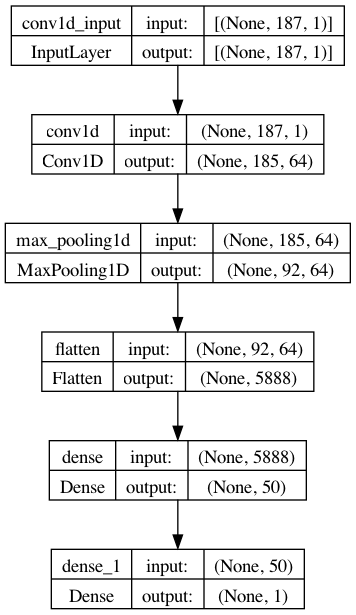

In [17]:
from keras.utils import plot_model
plot_model(cnn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [18]:
# Evaluate the CNN

predicted_probabilities = cnn_model.predict(X_test)

threshold = 0.5
predicted = (predicted_probabilities > threshold).astype(int).reshape(-1)



accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
balanced_accuracy = balanced_accuracy_score(y_test, predicted)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')
print(f'Balanced accuracy: {balanced_accuracy:.4f}')


137/137 [==============================] - 1s 3ms/step
Accuracy: 0.9556
Precision: 0.9588
Recall: 0.9815
F1 score: 0.9700
Balanced accuracy: 0.9330
